In [20]:
#!pip install pyswarm
#!pip install geneticalgorithm
#!pip install scikit-learn
#!pip install umap-learn
#!pip install pandas
#!pip install imbalanced-learn
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import warnings
import random
import pandas as pd

from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid

from IPython import display
from geneticalgorithm import geneticalgorithm as ga
from pyswarm import pso
from scipy.optimize import minimize
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

In [22]:
def ackly_function(variables):
    x = variables[0]
    y = variables[1]
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * pi * x)+cos(2 * pi * y))) + e + 20

def plot_function(ax, function, variables, invert=False, colormap='winter', rot_z=30, rot_xy=30, max_Z=None):
    cmap = plt.get_cmap(colormap)
    Z = np.clip(function(variables), 0, max_Z)
    if invert:
        Z = -Z
    surf = ax.plot_surface(variables[0], variables[1], Z, cmap=cmap,
                           linewidth=0, antialiased=False, alpha=0.5)
    ax.view_init(rot_z, rot_xy)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

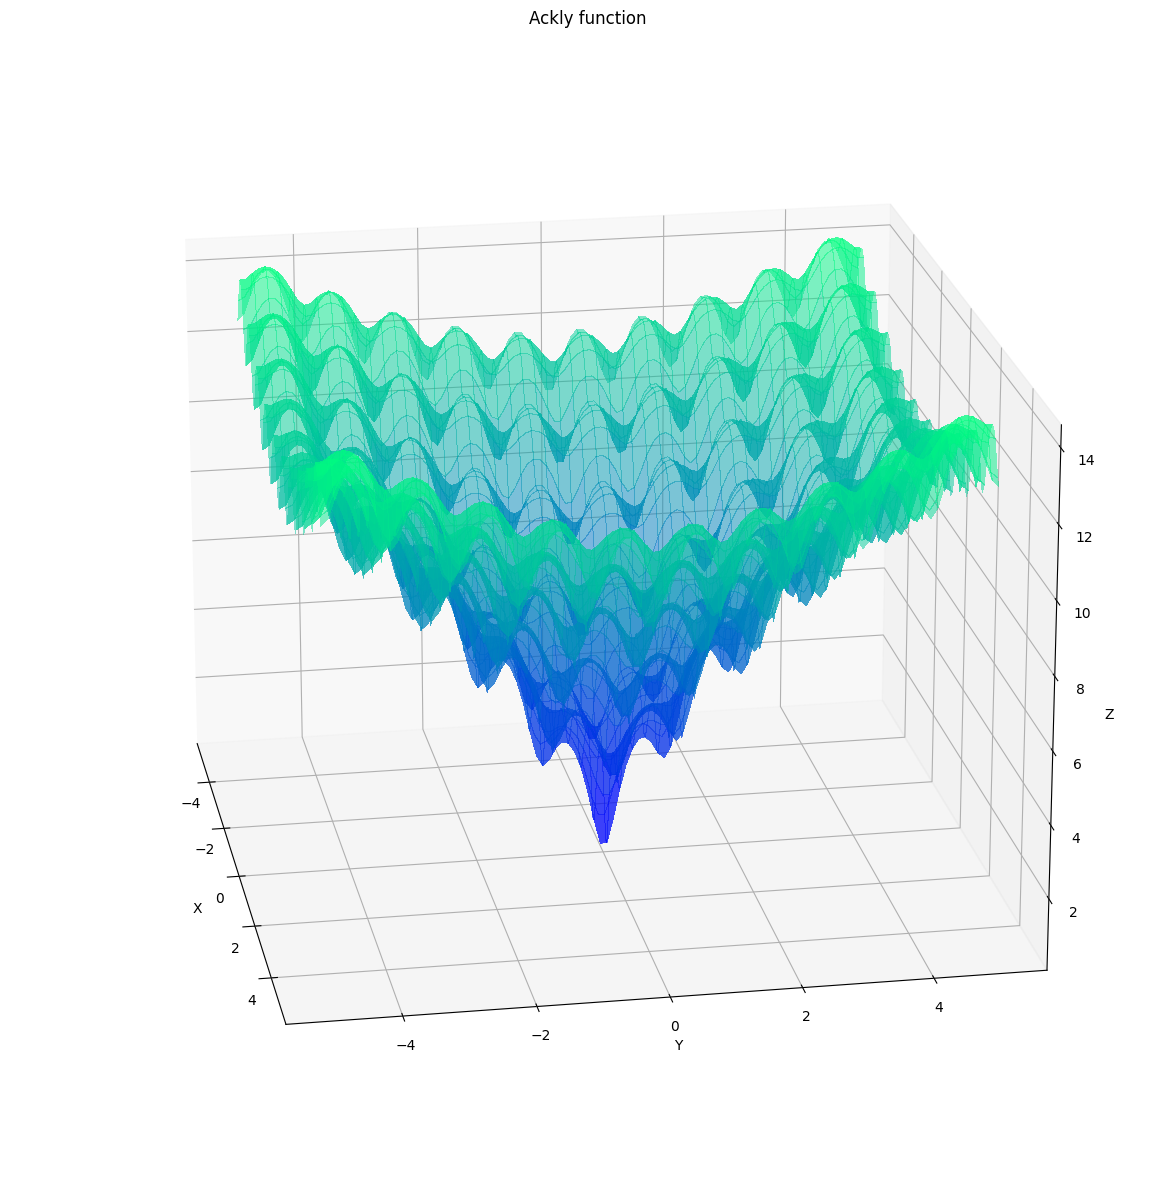

In [23]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xy = np.meshgrid(x, y)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection = '3d')
plot_function(ax, ackly_function, xy, colormap='winter', rot_z=20, rot_xy=-10)
ax.set_title('Ackly function')
plt.show()

Метод роя частиц (эволюционный)

In [24]:
%%time
XY = []
TARGETS = []
times = []
for i in range(100):
    start_time = time.time()
    lb = [-5, -5]
    ub = [5, 5]
    print(f"{i:3d}/100")
    display.clear_output(wait=True)
    xy, target = pso(ackly_function, lb, ub, minfunc=1e-18, minstep=1e-18, maxiter=100, swarmsize=200, debug=False)
    times.append(time.time()-start_time)
    XY.append(xy)
    TARGETS.append(target)

XY

Stopping search: maximum iterations reached --> 100
CPU times: user 1min 17s, sys: 357 ms, total: 1min 17s
Wall time: 1min 18s


[array([3.16501790e-16, 1.81455082e-16]),
 array([-1.04660167e-16, -2.40240739e-16]),
 array([-1.92014366e-16,  2.49254430e-16]),
 array([-5.66252277e-17,  2.87529263e-16]),
 array([-2.29917169e-16,  1.16683936e-16]),
 array([8.44389004e-17, 3.61341122e-16]),
 array([-3.08351220e-16, -3.49353774e-17]),
 array([-6.09940848e-17, -2.94171225e-16]),
 array([ 3.76261561e-16, -2.04645428e-17]),
 array([2.73049237e-16, 1.80827698e-16]),
 array([1.28720600e-16, 1.57195547e-15]),
 array([-2.90838093e-17,  1.37317234e-16]),
 array([ 5.27804956e-17, -3.68668894e-17]),
 array([8.78998684e-17, 1.89329733e-16]),
 array([ 2.07945410e-16, -2.41392806e-16]),
 array([-7.12553788e-17, -2.16183822e-16]),
 array([2.71315575e-16, 1.00427669e-16]),
 array([ 1.39157456e-16, -3.66459799e-16]),
 array([ 1.04642492e-16, -3.33889603e-16]),
 array([-2.24592876e-16, -2.06695870e-16]),
 array([-7.88742177e-17, -2.95256889e-16]),
 array([2.34971563e-16, 9.01713861e-17]),
 array([-1.14391770e-16, -1.95760337e-16]),
 a

In [25]:
print("Математическое ожидание по времени:", round(np.mean(times) * 100, 1), "секунд")
print("Дисперсия по времени:", round(np.var(times) * 100, 1), "seconds")

print("Математическое ожидание по значению функции:", (np.mean(TARGETS)))
print("Дисперсия по значению функции:", (np.var(TARGETS)))

print("Математическое ожидание (x, y):", (np.mean(XY, axis=0)))
print("Дисперсия (x, y):", (np.var(XY, axis=0)))

Математическое ожидание по времени: 79.0 секунд
Дисперсия по времени: 4.0 seconds
Математическое ожидание по значению функции: 3.552713678800501e-17
Дисперсия по значению функции: 1.2495556738700824e-31
Математическое ожидание (x, y): [3.57653359e-17 2.10767609e-17]
Дисперсия (x, y): [3.75604040e-32 6.33008238e-32]


Метод сопряженных градиентов


In [26]:
%%time
XY = []
TARGETS = []
times = []

for i in range(100):
    x_init = (np.random.rand(2)- 5.5)
    start_time = time.time()
    lb = [-5, -5]
    ub = [5, 5]
    print(f"{i:3d}/100")
    display.clear_output(wait=True)
    res = minimize(ackly_function, x_init, method='CG', tol=1e-9)
    times.append(time.time()-start_time)
    XY.append(res.x)
    TARGETS.append(res.fun)

TARGETS

CPU times: user 1.42 s, sys: 53 ms, total: 1.47 s
Wall time: 1.5 s


[12.632268991516,
 11.425348836217891,
 2.579927557030036,
 12.632268991516007,
 7.180951647715368,
 5.5744731497497924e-08,
 8.616250044048801,
 5.381864187490194,
 12.632268991516003,
 12.632268991516003,
 2.579927557029876,
 11.21754948001674,
 12.632268991516003,
 12.632268991516003,
 5.381864187490194,
 12.632268991516003,
 12.632268991516003,
 12.632268991516003,
 12.632268991516003,
 11.425348836217891,
 6.882582646801298,
 9.001093478292013,
 12.632268991516003,
 3.050153551953372e-08,
 12.632268991516003,
 12.632268991516002,
 12.632268991516003,
 10.120331273799986,
 2.612195615370183e-08,
 9.353039239137805,
 12.632268991516003,
 12.632268991516003,
 12.632268991516003,
 10.257974372149423,
 8.616250044048801,
 12.632268991516003,
 12.632268991516003,
 10.120350743632674,
 12.632268991516003,
 12.632268991516003,
 2.5799275570298725,
 12.632268991516003,
 12.632268991516003,
 8.813151774046894,
 5.381864187490198,
 12.632268991516003,
 10.120350743632674,
 12.632268991516003

In [27]:
print("Математическое ожидание по времени:", round(np.mean(times) * 100, 1), "seconds")
print("Дисперсия по времени:", round(np.var(times) * 100, 1), "seconds")

print("Математическое ожидание по значению функции:", (np.mean(TARGETS)))
print("Дисперсия по значению функции:", (np.var(TARGETS)))

print("Математическое ожидание (x, y):", (np.mean(XY, axis=0)))
print("Дисперсия (x, y):", (np.var(XY, axis=0)))

Математическое ожидание по времени: 1.5 seconds
Дисперсия по времени: 0.0 seconds
Математическое ожидание по значению функции: 10.101994595238388
Дисперсия по значению функции: 12.524032374956303
Математическое ожидание (x, y): [-2.8623191  -3.21956052]
Дисперсия (x, y): [8.29774539 6.26268818]


Сравнение времени работы алгоритмов

In [28]:
%%time

times = []
for i in range(100):
    print(f"{i:3d}/100")
    display.clear_output(wait=True)
    start_time = time.time()
    xy, target = pso(ackly_function, lb, ub, minfunc=1e-18, minstep=1e-18, maxiter=100, swarmsize=200, debug=False)
    times.append(time.time()-start_time)

pso_time = round(np.mean(times), 4)
print(xy)
print("Exp time:", pso_time, "seconds")

Stopping search: maximum iterations reached --> 100
[-3.49438997e-16 -5.87440701e-17]
Exp time: 0.7469 seconds
CPU times: user 1min 13s, sys: 334 ms, total: 1min 14s
Wall time: 1min 15s


In [29]:
%%time

times = []
for i in range(100):
    x_init = (np.random.rand(2)- 0.5)
    start_time = time.time()
    lb = [-5, -5]
    ub = [5, 5]
    print(f"{i:3d}/100")
    display.clear_output(wait=True)
    res = minimize(ackly_function, x_init, method='CG', tol=1e-9)
    times.append(time.time()-start_time)
    XY.append(res.x)
    TARGETS.append(res.fun)

minimize_time = round(np.mean(times), 4)
print(xy)
print("Exp time:", minimize_time, "seconds")

[-3.49438997e-16 -5.87440701e-17]
Exp time: 0.026 seconds
CPU times: user 2.48 s, sys: 56 ms, total: 2.53 s
Wall time: 2.6 s


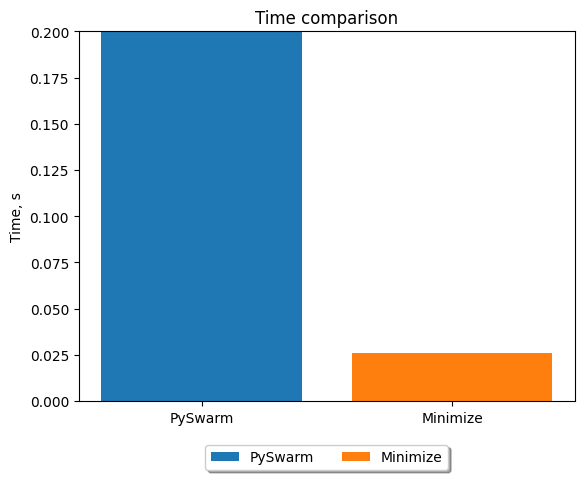

In [30]:
labels = ["PySwarm", "Minimize"]
x = [0.1, 0.2]
width = 0.08

fig.set_size_inches(12, 5)

func_bar = plt.bar(x[0], pso_time, width, label='PySwarm')
iter_bar = plt.bar(x[1], minimize_time, width, label='Minimize')

# Add some text for labels, title and custom x-pltis tick labels, etc.
plt.ylabel('Time, s')
plt.title('Time comparison')
plt.xticks(x, labels)
# plt.set_ticklabels(labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
        fancybox=True, shadow=True, ncol=3)

plt.ylim(top=0.2)

plt.show()

In [31]:
iterations = np.linspace(1, 10, 10)

points = []

for maxiter in iterations:
    xy, target = pso(ackly_function, lb, ub, minfunc=0, minstep=0, maxiter=maxiter, swarmsize=200, debug=True)
    print(f"{maxiter:.0f}/{len(iterations)}")
    display.clear_output(wait=True)
    points.append(xy)

points = np.array(points)
points
for point in points:
  print(ackly_function(point))

1.1388540337422057
2.532789477266718
0.7856345829112961
0.1473368756869604
0.1661335184088344
0.04236265470886025
0.05212680393930569
0.10356856437674722
0.01397504085646517
0.011111455544117632


/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:150: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


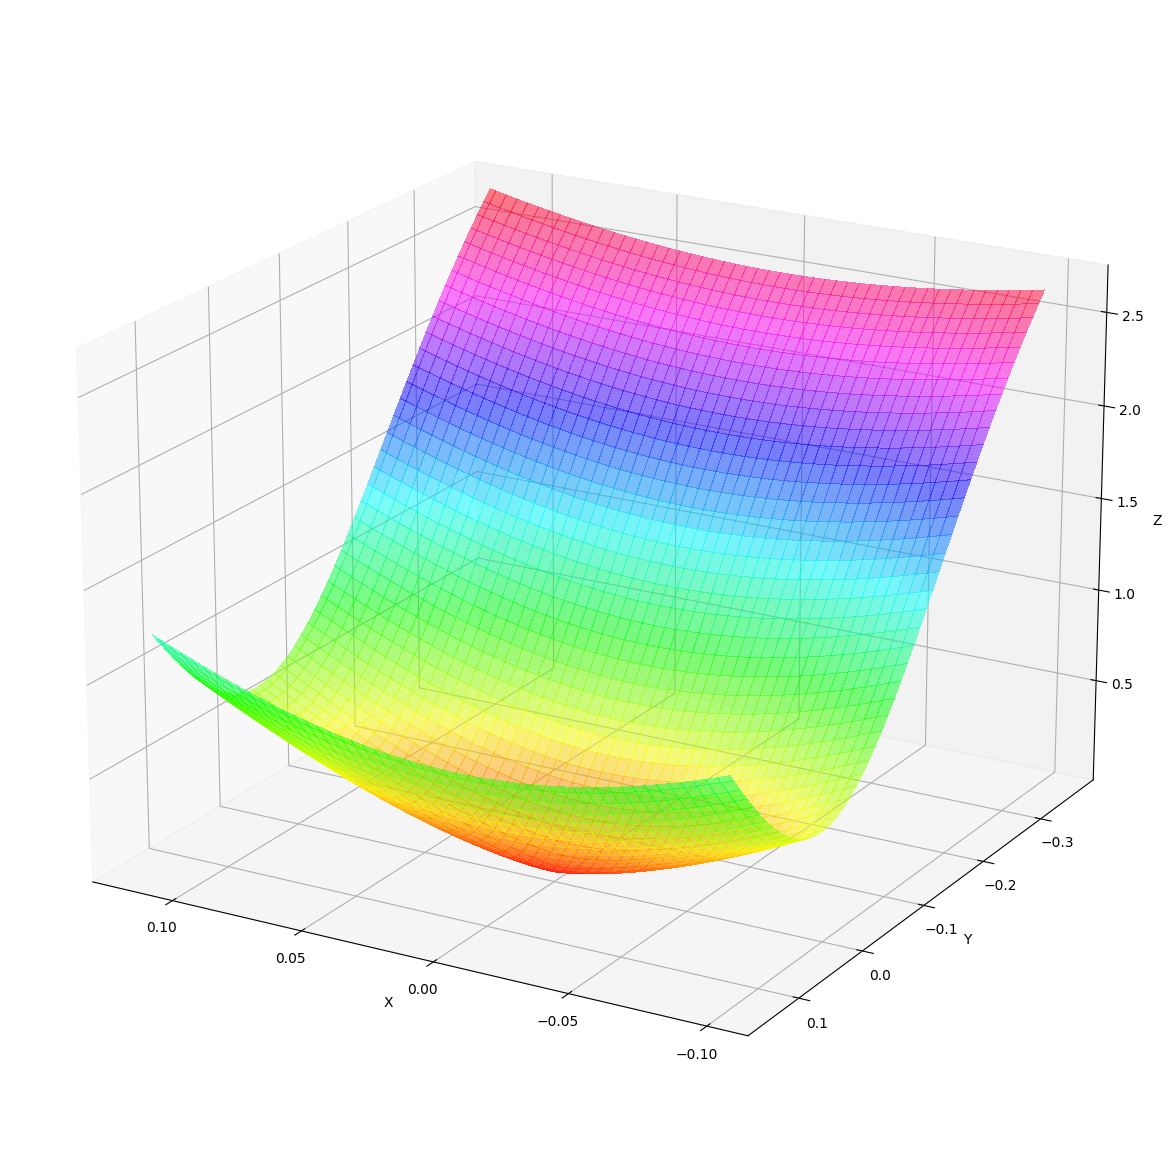

In [32]:
x_min, y_min = np.min(points, axis=0)
x_max, y_max = np.max(points, axis=0)
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)
xy = np.meshgrid(x, y)

n = len(iterations)

fig = plt.figure(figsize=(15, 15))

values = []
for i, maxiter in enumerate(iterations):
    ax = plt.subplot(projection='3d')
    point = np.meshgrid(points[i][0], points[i][1])
    point_value = ackly_function(point)
    values.append(point_value)
    ax.scatter(point[0], point[1], point_value, s=50, c='black', alpha=maxiter/10)
    ax.text(points[i][0], points[i][1], point_value+1e-2, f'({points[i][0]:.2f}, {points[i][1]:.2f}, {point_value[0][0]:.4f})', zdir='z')

ax = fig.add_subplot(projection = '3d')
plot_function(ax, ackly_function, xy, colormap='hsv', rot_z=20, rot_xy=120)
plt.show()

In [33]:
!pip install ucimlrepo

In [41]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

X = X.fillna(X.mean())

SVM

In [42]:
scores = []

def search_svm_params(variables, X, y):
    C = variables[0]
    degree = int(variables[1])
    print(variables[1])
    svc = SVC(C=C, degree=degree, kernel='rbf')

    X = StandardScaler().fit_transform(X)

    svc.fit(X, y)

    score = f1_score(y, svc.predict(X), average='macro') + 1e-8
    global scores
    scores.append(score)
    print(score)
    return min(1/point_value, score)

In [43]:
%%time
print(point_value)
lb = [10, 1]
ub = [20, 2]
xy, target = pso(search_svm_params, lb, ub, args=(X, y))
xy = xy.astype('int32')

Output hidden; open in https://colab.research.google.com to view.

In [44]:
scores

[1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,
 1.00000001,

In [45]:
target = max(scores)
xy

array([11,  1], dtype=int32)

In [46]:
target

1.00000001

In [48]:
print(f'F1 score: {100*target:.2f}%')
print(f'C, degree: {xy}')

F1 score: 100.00%
C, degree: [11  1]


KNN

In [49]:
scores = []
def search_knn_params(variables, X, y):
    C = int(variables[0])
    degree = variables[1]

    knn = KNeighborsClassifier(n_neighbors=C)
    features = StandardScaler().fit_transform(X)

    knn.fit(X, y)

    score = f1_score(y, knn.predict(X), average='macro') + 1e-8
    global scores
    scores.append(score)
    print(score)
    return min(1/point_value, score)

In [50]:
%%time
print(point_value)
lb = [1, 1]
ub = [10, 2]
xy, target = pso(search_knn_params, lb, ub, args=(X, y))
xy = xy.astype('int32')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
scores

In [ ]:
target = max(scores)
xy

In [ ]:
target

In [ ]:
print(f'F1 score: {100*target:.2f}%')
print(f'C, degree: {xy}')

RF

In [ ]:
scores = []
def search_rf_params(variables, features, targets):
    C = int(variables[0])
    degree = variables[1]

    rf = RandomForestClassifier(bootstrap = False, max_depth = None, max_features ='auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = C)
    features = StandardScaler().fit_transform(features)

    rf.fit(features, targets)

    score = f1_score(targets, rf.predict(features), average='macro') + 1e-8
    global scores
    scores.append(score)
    print(score)
    return min(1/point_value, score)

In [ ]:
%%time
print(point_value)
lb = [1, 1]
ub = [5, 2]
xy, target = pso(search_rf_params, lb, ub, args=(features, targets))
xy = xy.astype('int32')

In [ ]:
scores

In [ ]:
target = max(scores)
xy

In [ ]:
target

In [ ]:
print(f'F1 score: {100*target:.2f}%')
print(f'C, degree: {xy}')